
# Álgebra Lineal para Data Science

**Objetivo del notebook:**  
Entender en profundidad los conceptos básicos de **álgebra lineal** que se usan constantemente en ciencia de datos y machine learning, con explicaciones sencillas y ejemplos en Python.

## Índice
1. ¿Qué es un vector?
2. Normas y distancia
3. Producto escalar y ángulo entre vectores
4. Representar datos como vectores y matrices
5. Operaciones con matrices (transpuesta, multiplicación)
6. Ejercicios guiados y propuestos



## 1. ¿Qué es un vector?

Un **vector** es simplemente una lista ordenada de números.  
En Data Science:
- Un vector puede representar a **una persona** (altura, peso, edad...).
- O una **película** (puntuaciones de usuarios, géneros...).
- O una **palabra** en NLP (word embeddings).

Formalmente, un vector de dimensión 3 se puede escribir como:

\[
\mathbf{x} = (x_1, x_2, x_3)
\]

### ¿Por qué es importante?
Porque casi todo en ML se formula como:
- Datos = vectores.
- Predicciones = funciones que transforman vectores.


In [2]:

import numpy as np

# Crear algunos vectores
x = np.array([1, 2, 3])
y = np.array([4, 0, -1])

print("Vector x:", x)
print("Vector y:", y)
print("Dimensión de x:", x.shape)


Vector x: [1 2 3]
Vector y: [ 4  0 -1]
Dimensión de x: (3,)



### Ejercicio 1 (para ti)

Crea tres vectores que representen el perfil de 3 estudiantes con el siguiente formato:

\[
(estudio\_horas\_dia, duerme\_horas\_dia, juega\_videojuegos\_horas\_dia)
\]

Por ejemplo: `s1 = [3, 7, 2]`.  
Piensa: ¿quién parece más equilibrado? ¿quién parece más "viciado" a videojuegos?  
(Código recomendado: crea 3 arrays de NumPy y muéstralos).


In [3]:
x = np.array([4, 6, 5])
y = np.array([2, 7, 10])
z = np.array([13, 8, 0])
print(f'x es el mas equilibrado con estas horas: {x}\ny es el mas viciado con estas horas: {y}')

x es el mas equilibrado con estas horas: [4 6 5]
y es el mas viciado con estas horas: [ 2  7 10]



## 2. Normas y distancia

La **norma** de un vector es una medida de su "longitud". La más habitual es la **norma euclidiana**:

\[
\|\mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}
\]

En Data Science, la norma se usa para:
- Medir la **magnitud** de un vector.
- Regularización (castigar pesos grandes en modelos).
- Definir **distancias** entre puntos.

La **distancia euclidiana** entre dos vectores \(\mathbf{x}\) y \(\mathbf{y}\) es:

\[
d(\mathbf{x}, \mathbf{y}) = \|\mathbf{x} - \mathbf{y}\|
\]


In [4]:

# Norma y distancia euclidiana
x = np.array([3, 4])
y = np.array([0, 0])

norm_x = np.linalg.norm(x)
dist_xy = np.linalg.norm(x - y)

print("x =", x)
print("Norma de x =", norm_x)
print("Distancia entre x e y =", dist_xy)


x = [3 4]
Norma de x = 5.0
Distancia entre x e y = 5.0



### Ejercicio 2

1. Crea dos vectores en 3D, por ejemplo `a = [1, 2, 3]` y `b = [2, 0, 1]`.
2. Calcula su norma con `np.linalg.norm`.
3. Calcula la distancia entre ambos.

Reflexiona: si la distancia es pequeña, ¿qué significa sobre su parecido?


In [18]:
x = np.array([1, 2, 3])
y = np.array([2, 0, 1])

print(f'La norma de x es : {np.linalg.norm(x):.2f}')
print(f'La distancia ntre ambos es de {np.linalg.norm(x - y)}')

La norma de x es : 3.74
La distancia ntre ambos es de 3.0


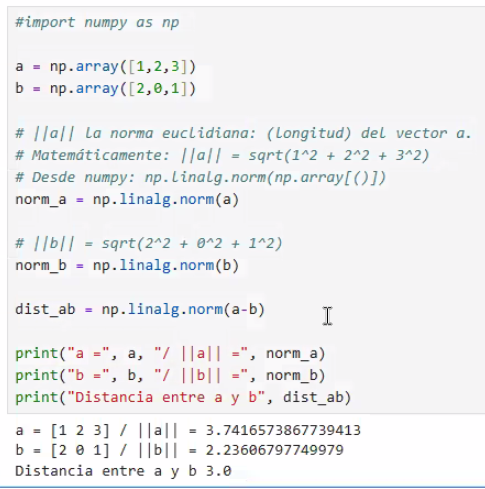


## 3. Producto escalar y ángulo entre vectores

El **producto escalar** (o dot product) de dos vectores \(\mathbf{x}\) y \(\mathbf{y}\) es:

\[
\mathbf{x} \cdot \mathbf{y} = x_1 y_1 + x_2 y_2 + \dots + x_n y_n
\]

Tiene una interpretación geométrica muy importante:

\[
\mathbf{x} \cdot \mathbf{y} = \|\mathbf{x}\| \, \|\mathbf{y}\| \cos(\theta)
\]

donde \(\theta\) es el ángulo entre los vectores.

### ¿Por qué importa en Data Science?
- Para medir **similitud** entre vectores.
- En NLP, recomendadores, visión por computador.
- La **similitud coseno** se basa justo en esto:
\[
\text{sim\_cos}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|}
\]


In [19]:

x = np.array([1, 2, 3])
y = np.array([4, 0, -1])

dot = np.dot(x, y)
norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
cos_sim = dot / (norm_x * norm_y)

print("x =", x)
print("y =", y)
print("Producto escalar x·y =", dot)
print("Similitud coseno =", cos_sim)


x = [1 2 3]
y = [ 4  0 -1]
Producto escalar x·y = 1
Similitud coseno = 0.06482037235521644



### Ejercicio 3

Imagina que tienes gustos de películas en escala 0–5 en el orden `[Acción, Comedia, Drama]`:

- Usuario A = `[5, 1, 2]`
- Usuario B = `[4, 2, 1]`
- Usuario C = `[1, 5, 4]`

1. Calcula la similitud coseno entre A y B, y entre A y C.
2. ¿Con quién se parece más A según la similitud coseno?

Pista: reutiliza el código de arriba y crea un pequeño bucle.


In [23]:
UsuarioA = np.array([5, 1, 2])
UsuarioB = np.array([4, 2, 1])
UsuarioC = np.array([1, 5, 4])

dotAB = np.dot(UsuarioA, UsuarioB)
dotAC = np.dot(UsuarioA, UsuarioC)

norm_A = np.linalg.norm(UsuarioA)
norm_B = np.linalg.norm(UsuarioB)
norm_C = np.linalg.norm(UsuarioC)

cos_simAB = dotAB / (norm_A * norm_B)
cos_simAC = dotAC / (norm_A * norm_C)

print(f'La similitud coseno entre A y B es :{cos_simAB:.2f}')
print(f'La similitud coseno entre A y C es :{cos_simAC:.2f}')
print('Se parecen mas A con B')

La similitud coseno entre A y B es :0.96
La similitud coseno entre A y C es :0.51
Se parecen mas A con B


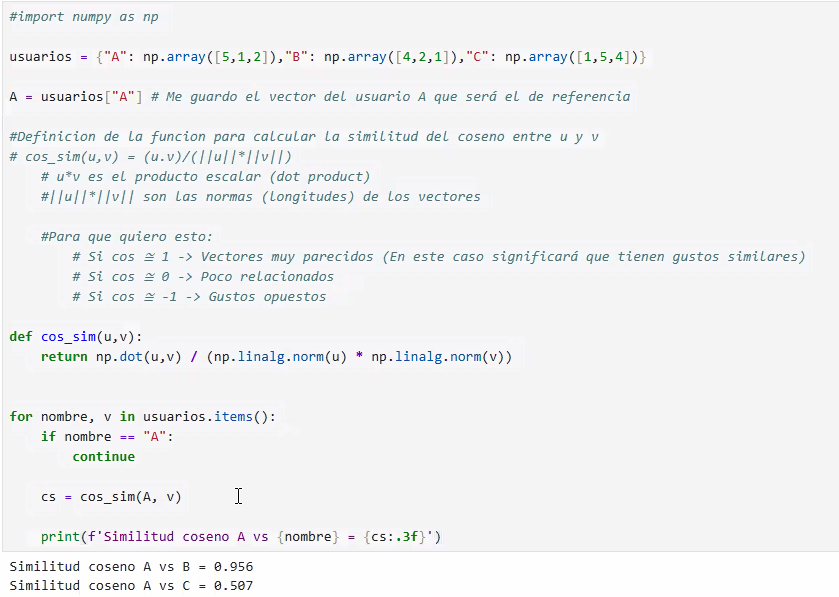


## 4. Representar datos como matrices

En Data Science, un dataset se representa casi siempre como una **matriz**:

- Cada **fila** = una observación (una persona, una casa, una película).
- Cada **columna** = una característica (**feature**) como edad, precio, tamaño, etc.

Si tenemos \(N\) observaciones y \(M\) features, la matriz \(X\) es de tamaño \(N \times M\).

Ejemplo: 4 casas con 3 características `[metros, habitaciones, antigüedad]`.


In [24]:

# Matriz de datos X
X = np.array([
    [70, 2, 30],
    [85, 3, 10],
    [60, 2, 20],
    [120, 4, 5]
])

print("Matriz X (casas):")
print(X)
print("Filas (N), columnas (M) =", X.shape)


Matriz X (casas):
[[ 70   2  30]
 [ 85   3  10]
 [ 60   2  20]
 [120   4   5]]
Filas (N), columnas (M) = (4, 3)



### Ejercicio 4

1. Imagina un dataset de alumnos con 3 columnas:
   - horas_estudio
   - horas_sueño
   - nota_anterior
2. Crea una matriz de 5 alumnos con valores inventados.
3. Comprueba su forma (`shape`).


In [25]:
alumnos = np.array([
    [6, 8, 9],
    [8, 8, 8],
    [3, 12, 4],
    [4, 6, 7],
    [8, 9, 2]
])
alumnos.shape

(5, 3)


## 5. Operaciones con matrices

Las operaciones básicas que usaremos mucho son:

- **Transpuesta**: \(X^T\), intercambia filas por columnas.
- **Multiplicación**: \(X \cdot w\) para calcular predicciones lineales.
- **Matriz identidad**: actúa como el 1 en los números.

### Regresión lineal en forma matricial

Si \(X\) es la matriz de datos (con una columna de 1s para el sesgo) y \(w\) es el vector de parámetros, la predicción es:

\[
\hat{y} = X w
\]

Esto es solo una multiplicación de matriz por vector.


In [26]:

# Ejemplo: regresión lineal simple con matriz
# Supongamos X con columna de 1s (bias) y una feature "horas_estudio"
X = np.array([
    [1, 1.0],
    [1, 2.0],
    [1, 3.0],
    [1, 4.0]
])
y = np.array([5, 6, 7, 8])   # valores objetivo (ej: nota)

# Vector de pesos (bias y peso de horas)
w = np.array([4, 1])  # y_hat = 4 + 1*horas

y_hat = X @ w
print("X =\n", X)
print("w =", w)
print("Predicciones y_hat =", y_hat)


X =
 [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]
w = [4 1]
Predicciones y_hat = [5. 6. 7. 8.]



### Ejercicio 5

1. Cambia el vector de pesos `w` y observa cómo cambian las predicciones.
2. Piensa: ¿qué papel tiene el primer elemento de `w` (el que multiplica a la columna de 1s)?
3. ¿Qué representa el segundo elemento de `w`?

Respuesta intuitiva: intercepto (término constante) y pendiente (efecto de la feature).


In [32]:
X = np.array([
    [1, 1.0],
    [1, 2.0],
    [1, 3.0],
    [1, 4.0]
])

y = np.array([5, 6, 7, 8])   
w = np.array([5, 2])  

y_hat = X @ w # @ hace el producto matriz-vector // para cada fila(1,x) calcula 1*w0 + x*w1 
print("X =\n", X)
print("w =", w)
print("Predicciones y_hat =", y_hat)



X =
 [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]
w = [5 2]
Predicciones y_hat = [ 7.  9. 11. 13.]


El primer elemento es el sesgo si no lo he entendido mal.

El segundo elemento es la representacion de cuanto cambia la prediccion segun el numero que pongas, la pendiente vamos, si es negativa la nota bajaria proporcionalmente 